In [56]:
# ライブラリの読み込み
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# グラフをインラインで表示させる
%matplotlib inline

# Pandasでの表示が省略されないように設定
pd.set_option("max_columns", 100)
pd.set_option('max_rows',1000)
pd.set_option('max_info_columns',100)

In [57]:
# データの読み込み（csvファイル）
# ヘッダーが無いcsvファイルを読み込むときは引数に'header=None'を指定
train = pd.read_csv('jleague_train.csv',dtype = {'y' : 'int'})
test = pd.read_csv('j_test.csv')


In [58]:
train_add = pd.read_csv('j_train_add.csv',dtype = {'y' : 'int'})
condition= pd.read_csv('condition.csv')
add_2014 =pd.read_csv('2014_add.csv',dtype = {'y' : 'int'})
condition_add = pd.read_csv('condition_add.csv')
stadium = pd.read_csv('stadium.csv')

In [59]:
# trainデータと追加データを結合
train1 = pd.concat([train, train_add,add_2014], axis=0)
# 'id'順に並べ，indexを振りなおす
train2 = train1.sort_values('id').reset_index(drop=True)
# conditionデータと追加データを結合
condition1 = pd.concat([condition, condition_add], axis=0)
# 'id'順に並べ，indexを振りなおす
condition2 = condition1.sort_values('id').reset_index(drop=True)
# train, testデータを関連付けするために，stadiumデータの名前を変更
stadium = stadium.rename(columns= {'name': 'stadium'})

In [60]:
# train, condition, stadiumデータを結合
train = pd.merge(train2, condition2)
train = pd.merge(train, stadium,)
# test, condition, stadiumデータを結合
test = pd.merge(test, condition2)
test = pd.merge(test, stadium)

In [37]:
# csv出力
train.to_csv('train_new.csv')
test.to_csv('test_new.csv')

In [38]:
train[train.columns[train.isnull().sum()>0]].isnull().sum()

y    38
dtype: int64

In [61]:
train = train.dropna(subset=["y"])

In [62]:
drop_elements = ['home_team','home_01','home_02','home_03',
'home_04',
'home_05',
'home_06',
'home_07',
'home_08',
'home_09',
'home_10',
'home_11',
'away_team',
'away_01',
'away_02',
'away_03',
'away_04',
'away_05',
'away_06',
'away_07',
'away_08',
'away_09',
'away_10',
'away_11',
'referee']
                 

In [63]:
train = train.drop(drop_elements,axis=1)

In [64]:
test = test.drop(drop_elements,axis=1)

In [43]:
print(test.shape)
print(train.shape)

(313, 17)
(1953, 18)


In [15]:
print(train.info())
print("")
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 1987
Data columns (total 18 columns):
away           1953 non-null object
gameday        1953 non-null object
home           1953 non-null object
id             1953 non-null int64
match          1953 non-null object
stadium        1953 non-null object
stage          1953 non-null object
time           1953 non-null object
tv             1953 non-null object
y              1953 non-null float64
year           1953 non-null int64
home_score     1953 non-null int64
away_score     1953 non-null int64
weather        1953 non-null object
temperature    1953 non-null float64
humidity       1953 non-null object
address        1953 non-null object
capa           1953 non-null int64
dtypes: float64(2), int64(5), object(11)
memory usage: 289.9+ KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 0 to 312
Data columns (total 17 columns):
id             313 non-null int64
year           313 non-null int64
stag

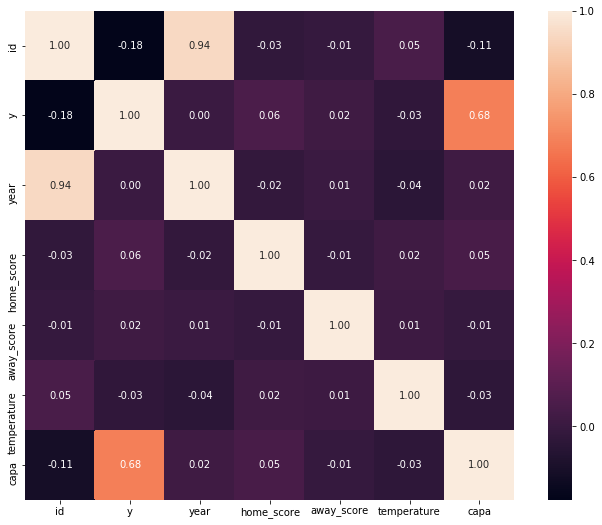

In [16]:
# ヒートマップの表示
plt.figure(figsize=(12, 9))
# annot : 数値を表示するかどうか(annotation)
# square: 四角を正方形に合わせるかどうか
# fmt   : 表示する数値の形式(formatting)
sns.heatmap(train.corr(), annot=True, square=True, fmt='.2f')
plt.show()

In [65]:
# string label to categorical values
from sklearn.preprocessing import LabelEncoder

for i in range(train.shape[1]):
    if train.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(train.iloc[:,i].values))
        train.iloc[:,i] = lbl.transform(list(train.iloc[:,i].values))

In [66]:
for i in range(test.shape[1]):
    if test.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(test.iloc[:,i].values))
        test.iloc[:,i] = lbl.transform(list(test.iloc[:,i].values))

In [19]:
train.head(10)

,away,gameday,home,id,match,stadium,stage,time,tv,y,year,home_score,away_score,weather,temperature,humidity,address,capa
0,38,8,16,13994,0,15,0,13,223,18250.0,2012,1,0,25,3.8,52,15,19694
1,24,20,16,14012,37,15,0,4,149,11831.0,2012,4,1,23,8.9,43,15,19694
2,13,33,16,14031,62,15,0,12,208,13147.0,2012,2,2,11,6.1,39,15,19694
3,40,47,16,14055,66,15,0,52,200,17192.0,2012,4,0,1,10.4,41,15,19694
4,36,62,16,14075,2,15,0,5,207,18525.0,2012,0,1,13,16.9,54,15,19694
5,22,77,16,14099,6,15,0,45,142,16317.0,2012,4,0,1,19.1,29,15,19694
6,7,104,16,14111,10,15,0,9,151,13554.0,2012,4,1,25,19.1,76,15,19694
7,9,113,16,14130,14,15,0,46,142,18722.0,2012,2,2,1,20.4,48,15,19694
8,8,136,16,14158,21,15,0,46,142,14611.0,2012,1,1,1,27.6,64,15,19694
9,32,141,16,14166,24,15,0,46,142,17935.0,2012,2,2,11,25.9,71,15,19694


In [445]:
train["y"]

0       18250.0
1       11831.0
2       13147.0
3       17192.0
4       18525.0
5       16317.0
6       13554.0
7       18722.0
8       14611.0
9       17935.0
10      17715.0
11      17159.0
12      15509.0
13      18003.0
14      17711.0
15      17493.0
16      18526.0
17      16353.0
18      13232.0
19      12883.0
20      13655.0
21      14359.0
22      14327.0
23      13470.0
24      14318.0
25      11755.0
26      14365.0
27      17892.0
28      15101.0
29      13411.0
30      17849.0
31      15178.0
32      17394.0
33      15852.0
34      13380.0
35      11144.0
36      11413.0
37      13040.0
38      12945.0
39      18863.0
40      13302.0
42      24316.0
43      13824.0
44      12896.0
45      20512.0
46      16657.0
47      24397.0
48      30354.0
49      22332.0
50      23892.0
51      21748.0
52      13159.0
53      12075.0
54      18512.0
55      17950.0
56      15881.0
57      30478.0
58      14016.0
59      17483.0
60      26369.0
61      21657.0
62      15214.0
63      

In [67]:
train['y'] = train['y'].astype(np.int64)
train["y"]

0       18250
1       11831
2       13147
3       17192
4       18525
5       16317
6       13554
7       18722
8       14611
9       17935
10      17715
11      17159
12      15509
13      18003
14      17711
15      17493
16      18526
17      16353
18      13232
19      12883
20      13655
21      14359
22      14327
23      13470
24      14318
25      11755
26      14365
27      17892
28      15101
29      13411
30      17849
31      15178
32      17394
33      15852
34      13380
35      11144
36      11413
37      13040
38      12945
39      18863
40      13302
42      24316
43      13824
44      12896
45      20512
46      16657
47      24397
48      30354
49      22332
50      23892
51      21748
52      13159
53      12075
54      18512
55      17950
56      15881
57      30478
58      14016
59      17483
60      26369
61      21657
62      15214
63      19505
64      38966
65      20781
66      22635
67      17066
68      15072
69      17134
70       8548
71      10840
72    

In [71]:
# keep ID for submission
train_ID = train['id']
test_ID = test['id']

# split data for training
y_train = train['y'].values
X_train = train.drop(['id','y'], axis=1)
X_test = test.drop('id', axis=1)
X_train = X_train.values



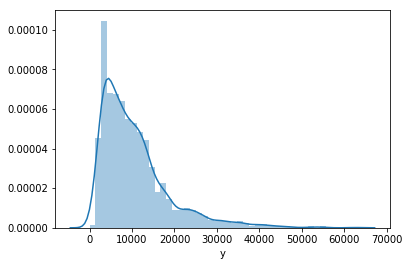

In [22]:
ax = sns.distplot(y_train)
plt.show()

In [23]:
y_train.dtypes

dtype('int64')

In [48]:
np.all(np.isfinite(y_train))
np.any(np.isnan(y_train))

False

In [49]:
np.where(np.isnan(X_train))
(np.isnan(y_train))

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71      False
72    

In [358]:
print(np.isfinite(X_train).all())
np.isfinite(y_train).all()

away           True
gameday        True
home           True
match          True
stadium        True
stage          True
time           True
tv             True
year           True
home_score     True
away_score     True
weather        True
temperature    True
humidity       True
referee        True
home_team      True
home_01        True
home_02        True
home_03        True
home_04        True
home_05        True
home_06        True
home_07        True
home_08        True
home_09        True
home_10        True
home_11        True
away_team      True
away_01        True
away_02        True
away_03        True
away_04        True
away_05        True
away_06        True
away_07        True
away_08        True
away_09        True
away_10        True
away_11        True
address        True
capa           True
dtype: bool


True

Training done using Random Forest


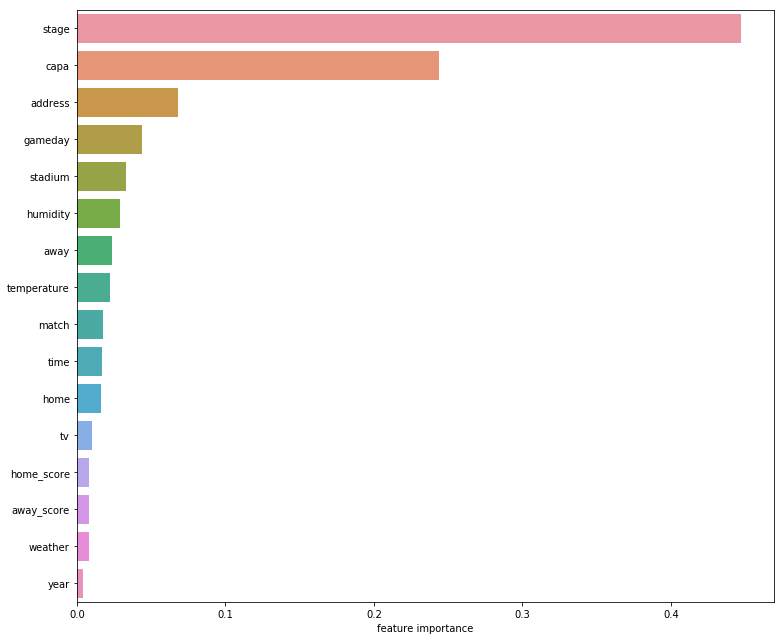

In [69]:
# feature importance using random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(X_train, y_train)
print('Training done using Random Forest')

ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

In [362]:
# csv出力
X_train.to_csv('X_train_j.csv')
y_train.to_csv('y_train_j.csv')

In [28]:
# データの分割方法を指定
from sklearn.model_selection import KFold
kf_3 = KFold(n_splits=5, shuffle=True, random_state=0)

In [77]:
y_train = y_train.reshape(-1,1)

In [78]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_std = ss.fit_transform(X_train) # すべての説明変数を変換
y_std = ss.fit_transform(y_train)

In [79]:
# ホールド・アウト法によるデータの分割
# (X, y, テストにどの割合を割くか, 分割のしかたを決める乱数生成器)
# テストデータの割合は、test_size引数に指定することで変更可能です（今回は、train:test = 7:3）
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)

In [80]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [81]:
# 交差検証を実行
# (モデル, 説明変数, 目的変数, 分割の方法)
from sklearn.model_selection import cross_val_score
scores_3 = cross_val_score(lr, X_train, y_train, cv=kf_3)
scores_3.mean()

0.6582790244033258